C:\Users\wolfu\AppData\Local\Temp\ipykernel_14464\441674717.py:21: DtypeWarning: Columns (16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Datos/dataset_modelo.csv')



Entrenando modelo 1 con capas ocultas: (64, 32)
Precisión: 0.9484

Entrenando modelo 2 con capas ocultas: (32, 16)
Precisión: 0.9490

Entrenando modelo 3 con capas ocultas: (128, 64, 32)
Precisión: 0.9492

Entrenando modelo 4 con capas ocultas: (16, 8)
Precisión: 0.9480

Entrenando modelo 5 con capas ocultas: (100,)
Precisión: 0.9484

--- Modelo Top 1 ---
Capas ocultas: (128, 64, 32)
Matriz de confusión:
[[154676   1622]
 [  6837   3314]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    156298
           1       0.67      0.33      0.44     10151

    accuracy                           0.95    166449
   macro avg       0.81      0.66      0.71    166449
weighted avg       0.94      0.95      0.94    166449



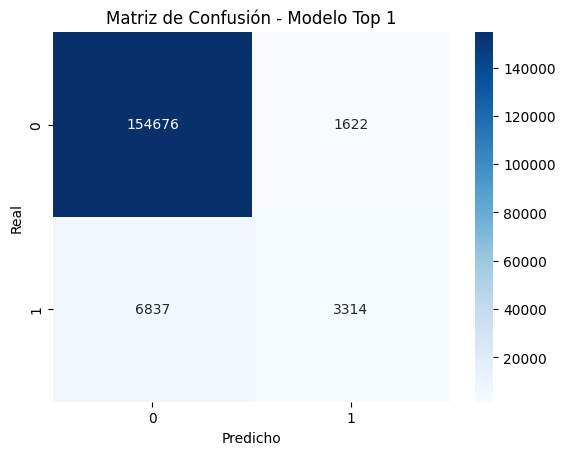


--- Modelo Top 2 ---
Capas ocultas: (32, 16)
Matriz de confusión:
[[154655   1643]
 [  6846   3305]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    156298
           1       0.67      0.33      0.44     10151

    accuracy                           0.95    166449
   macro avg       0.81      0.66      0.71    166449
weighted avg       0.94      0.95      0.94    166449



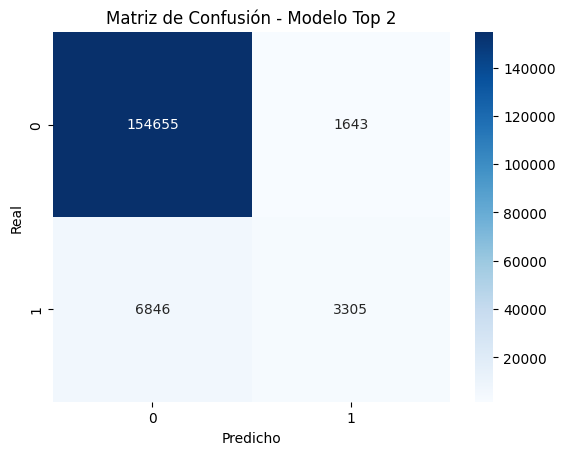


--- Modelo Top 3 ---
Capas ocultas: (100,)
Matriz de confusión:
[[154987   1311]
 [  7279   2872]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    156298
           1       0.69      0.28      0.40     10151

    accuracy                           0.95    166449
   macro avg       0.82      0.64      0.69    166449
weighted avg       0.94      0.95      0.94    166449



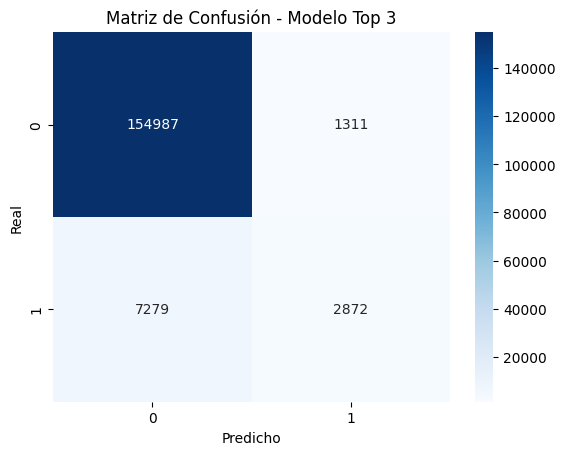

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Selección de características
selected_features = [
    "Ano Ocurrencia", 
    "Departamento de Ocurrencia", 
    "Edad del Hombre", 
    "Edad de la Mujer",
    "Escolaridad del Hombre",
    "Escolaridad de la Mujer"
]

df = pd.read_csv('../Datos/dataset_modelo.csv')

ocupacion_columns = ['Ocupacion del Hombre', 'Ocupacion de la Mujer']

df['Clase de Union'] = df['Clase de Union'].replace(9, np.nan)
df['Numero de Nupcias del Hombre'] = df['Numero de Nupcias del Hombre'].replace(9, np.nan)
df['Numero de Nupcias de la Mujer'] = df['Numero de Nupcias de la Mujer'].replace(9, np.nan)
df['Edad del Hombre'] = df['Edad del Hombre'].replace(999, np.nan)
df['Edad de la Mujer'] = df['Nacionalidad de la Mujer'].replace(999, np.nan)
df['Pueblo de Pertenencia del Hombre'] = df['Pueblo de Pertenencia del Hombre'].replace(9, np.nan)
df['Pueblo de Pertenencia de la Mujer'] = df['Pueblo de Pertenencia de la Mujer'].replace(9, np.nan)
df['Nacionalidad del Hombre'] = df['Nacionalidad del Hombre'].replace(9999, np.nan)
df['Nacionalidad de la Mujer'] = df['Nacionalidad de la Mujer'].replace(9999, np.nan)
df['Escolaridad del Hombre'] = df['Escolaridad del Hombre'].replace(9, np.nan)
df['Escolaridad de la Mujer'] = df['Escolaridad de la Mujer'].replace(9, np.nan)
df['Ocupacion del Hombre'] = df['Ocupacion del Hombre'].replace(99, np.nan)
df['Ocupacion de la Mujer'] = df['Ocupacion de la Mujer'].replace(99, np.nan)
df[ocupacion_columns] = df[ocupacion_columns].replace(["IGNORADO", "NEOG"], np.nan)
df['Area Geografica de la Ocurrencia'] = df['Area Geografica de la Ocurrencia'].replace(9, np.nan)

# Preparación de los datos
X = df[selected_features].copy()
y = df['divorcio']

# Imputación de valores faltantes
imputer = SimpleImputer(strategy='median')
X_imputado = pd.DataFrame(imputer.fit_transform(X), columns=selected_features)

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputado)

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Diferentes arquitecturas de redes
configuraciones = [
    (64, 32),
    (32, 16),
    (128, 64, 32),
    (16, 8),
    (100,)
]

resultados = []

# Entrenamiento y evaluación de modelos
for i, capas in enumerate(configuraciones):
    print(f"\nEntrenando modelo {i+1} con capas ocultas: {capas}")
    modelo = MLPClassifier(hidden_layer_sizes=capas, max_iter=500, random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Precisión: {acc:.4f}")
    resultados.append({
        'modelo': modelo,
        'capas': capas,
        'accuracy': acc,
        'y_pred': y_pred
    })

# Selección de los tres mejores modelos
mejores = sorted(resultados, key=lambda x: x['accuracy'], reverse=True)[:3]

# Evaluación detallada
for i, r in enumerate(mejores):
    print(f"\n--- Modelo Top {i+1} ---")
    print(f"Capas ocultas: {r['capas']}")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, r['y_pred']))
    print("Reporte de clasificación:")
    print(classification_report(y_test, r['y_pred']))
    
    sns.heatmap(confusion_matrix(y_test, r['y_pred']), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - Modelo Top {i+1}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()



# Pruebas con las muestras 

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def procesar_dataset(ruta_csv, nombre_dataset):
    print(f"\n--- Procesando {nombre_dataset} ---")
    
    df = pd.read_csv(ruta_csv)
    
    # Limpieza
    ocupacion_columns = ['Ocupacion del Hombre', 'Ocupacion de la Mujer']
    df['Clase de Union'] = df['Clase de Union'].replace(9, np.nan)
    df['Numero de Nupcias del Hombre'] = df['Numero de Nupcias del Hombre'].replace(9, np.nan)
    df['Numero de Nupcias de la Mujer'] = df['Numero de Nupcias de la Mujer'].replace(9, np.nan)
    df['Edad del Hombre'] = df['Edad del Hombre'].replace(999, np.nan)
    df['Edad de la Mujer'] = df['Edad de la Mujer'].replace(999, np.nan)  # <-- Aquí arreglado
    df['Pueblo de Pertenencia del Hombre'] = df['Pueblo de Pertenencia del Hombre'].replace(9, np.nan)
    df['Pueblo de Pertenencia de la Mujer'] = df['Pueblo de Pertenencia de la Mujer'].replace(9, np.nan)
    df['Nacionalidad del Hombre'] = df['Nacionalidad del Hombre'].replace(9999, np.nan)
    df['Nacionalidad de la Mujer'] = df['Nacionalidad de la Mujer'].replace(9999, np.nan)
    df['Escolaridad del Hombre'] = df['Escolaridad del Hombre'].replace(9, np.nan)
    df['Escolaridad de la Mujer'] = df['Escolaridad de la Mujer'].replace(9, np.nan)
    df['Ocupacion del Hombre'] = df['Ocupacion del Hombre'].replace(99, np.nan)
    df['Ocupacion de la Mujer'] = df['Ocupacion de la Mujer'].replace(99, np.nan)
    df[ocupacion_columns] = df[ocupacion_columns].replace(["IGNORADO", "NEOG"], np.nan)
    df['Area Geografica de la Ocurrencia'] = df['Area Geografica de la Ocurrencia'].replace(9, np.nan)

    selected_features = [
        "Ano Ocurrencia", 
        "Departamento de Ocurrencia", 
        "Edad del Hombre", 
        "Edad de la Mujer",
        "Escolaridad del Hombre",
        "Escolaridad de la Mujer"
    ]

    # Preparación
    X = df[selected_features].copy()
    y = df['divorcio']

    imputer = SimpleImputer(strategy='median')
    X_imputado = pd.DataFrame(imputer.fit_transform(X), columns=selected_features)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputado)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    configuraciones = [
        (64, 32),
        (32, 16),
        (128, 64, 32),
        (16, 8),
        (100,)
    ]

    resultados = []

    for i, capas in enumerate(configuraciones):
        print(f"\nEntrenando modelo {i+1} con capas ocultas: {capas}")
        modelo = MLPClassifier(hidden_layer_sizes=capas, max_iter=500, random_state=42)
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"Precisión: {acc:.4f}")
        resultados.append({
            'modelo': modelo,
            'capas': capas,
            'accuracy': acc,
            'y_pred': y_pred
        })

    mejores = sorted(resultados, key=lambda x: x['accuracy'], reverse=True)[:3]

        # Evaluación de los tres mejores modelos
    for i, r in enumerate(mejores):
        modelo = r['modelo']
        y_pred_test = r['y_pred']
        y_pred_train = modelo.predict(X_train)

        acc_train = accuracy_score(y_train, y_pred_train)
        acc_test = r['accuracy']

        print(f"\n--- {nombre_dataset} - Modelo Top {i+1} ---")
        print(f"Capas ocultas: {r['capas']}")
        print(f"Accuracy en entrenamiento: {acc_train:.4f}")
        print(f"Accuracy en prueba: {acc_test:.4f}")

        # Diagnóstico de overfitting/desajuste
        diff = acc_train - acc_test
        if diff > 0.1:
            print(" Posible sobreajuste: mucha diferencia entre entrenamiento y prueba.")
        elif diff < -0.1:
            print(" Posible desajuste: el modelo rinde mejor en prueba que en entrenamiento.")
        else:
            print(" Rendimiento equilibrado entre entrenamiento y prueba.")

        # Matriz de confusión y reporte
        print("\nMatriz de confusión (test):")
        print(confusion_matrix(y_test, y_pred_test))
        print("\nReporte de clasificación (test):")
        print(classification_report(y_test, y_pred_test))

        sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
        plt.title(f"{nombre_dataset} - Matriz de Confusión - Modelo Top {i+1}")
        plt.xlabel("Predicho")
        plt.ylabel("Real")
        plt.show()




--- Procesando Dataset Muestra 50 50 ---


C:\Users\wolfu\AppData\Local\Temp\ipykernel_12200\3434716314.py:14: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv)



Entrenando modelo 1 con capas ocultas: (64, 32)
Precisión: 0.8148

Entrenando modelo 2 con capas ocultas: (32, 16)
Precisión: 0.8069

Entrenando modelo 3 con capas ocultas: (128, 64, 32)


c:\Users\wolfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Precisión: 0.8814

Entrenando modelo 4 con capas ocultas: (16, 8)
Precisión: 0.7964

Entrenando modelo 5 con capas ocultas: (100,)
Precisión: 0.7999

--- Dataset Muestra 50 50 - Modelo Top 1 ---
Capas ocultas: (128, 64, 32)
Accuracy en entrenamiento: 0.8957
Accuracy en prueba: 0.8814
 Rendimiento equilibrado entre entrenamiento y prueba.

Matriz de confusión (test):
[[53949  7292]
 [ 7251 54175]]

Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     61241
           1       0.88      0.88      0.88     61426

    accuracy                           0.88    122667
   macro avg       0.88      0.88      0.88    122667
weighted avg       0.88      0.88      0.88    122667



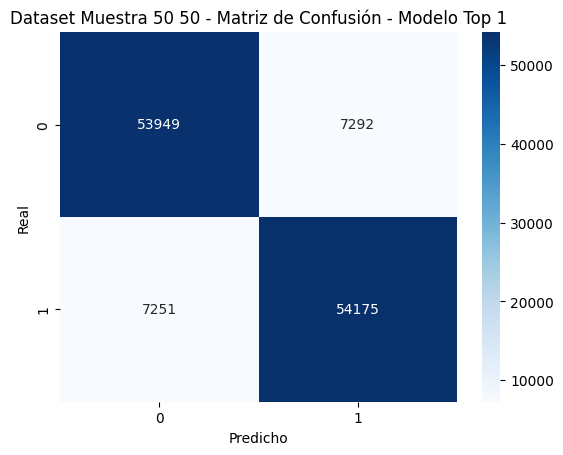


--- Dataset Muestra 50 50 - Modelo Top 2 ---
Capas ocultas: (64, 32)
Accuracy en entrenamiento: 0.8185
Accuracy en prueba: 0.8148
 Rendimiento equilibrado entre entrenamiento y prueba.

Matriz de confusión (test):
[[48936 12305]
 [10417 51009]]

Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     61241
           1       0.81      0.83      0.82     61426

    accuracy                           0.81    122667
   macro avg       0.82      0.81      0.81    122667
weighted avg       0.82      0.81      0.81    122667



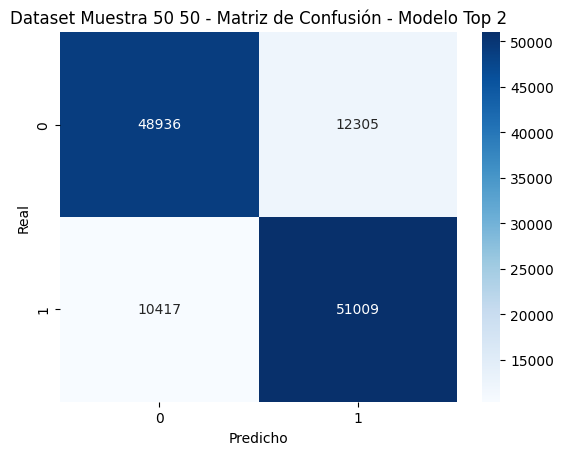


--- Dataset Muestra 50 50 - Modelo Top 3 ---
Capas ocultas: (32, 16)
Accuracy en entrenamiento: 0.8083
Accuracy en prueba: 0.8069
 Rendimiento equilibrado entre entrenamiento y prueba.

Matriz de confusión (test):
[[49148 12093]
 [11592 49834]]

Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     61241
           1       0.80      0.81      0.81     61426

    accuracy                           0.81    122667
   macro avg       0.81      0.81      0.81    122667
weighted avg       0.81      0.81      0.81    122667



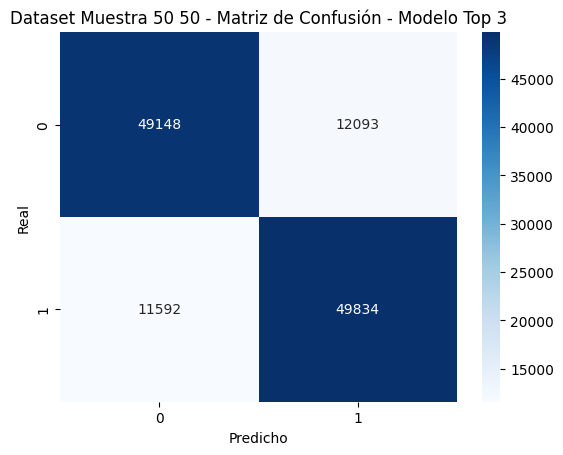


--- Procesando Dataset Muestra 40 60 ---


C:\Users\wolfu\AppData\Local\Temp\ipykernel_12200\3434716314.py:14: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv)



Entrenando modelo 1 con capas ocultas: (64, 32)
Precisión: 0.8258

Entrenando modelo 2 con capas ocultas: (32, 16)
Precisión: 0.8096

Entrenando modelo 3 con capas ocultas: (128, 64, 32)


c:\Users\wolfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Precisión: 0.8771

Entrenando modelo 4 con capas ocultas: (16, 8)
Precisión: 0.8012

Entrenando modelo 5 con capas ocultas: (100,)
Precisión: 0.8083

--- Dataset Muestra 40 60 - Modelo Top 1 ---
Capas ocultas: (128, 64, 32)
Accuracy en entrenamiento: 0.8926
Accuracy en prueba: 0.8771
 Rendimiento equilibrado entre entrenamiento y prueba.

Matriz de confusión (test):
[[34178  6607]
 [ 5952 55486]]

Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     40785
           1       0.89      0.90      0.90     61438

    accuracy                           0.88    102223
   macro avg       0.87      0.87      0.87    102223
weighted avg       0.88      0.88      0.88    102223



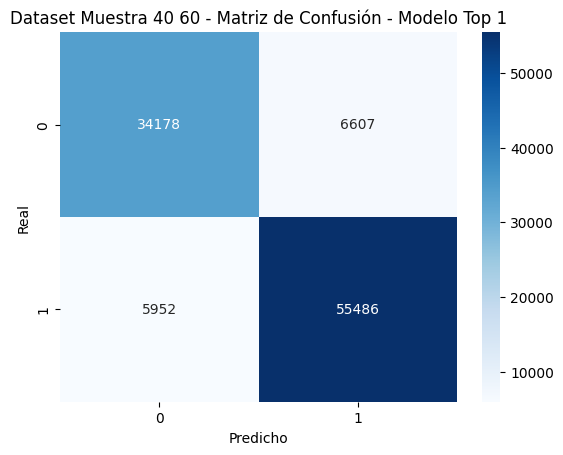


--- Dataset Muestra 40 60 - Modelo Top 2 ---
Capas ocultas: (64, 32)
Accuracy en entrenamiento: 0.8293
Accuracy en prueba: 0.8258
 Rendimiento equilibrado entre entrenamiento y prueba.

Matriz de confusión (test):
[[29152 11633]
 [ 6173 55265]]

Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       0.83      0.71      0.77     40785
           1       0.83      0.90      0.86     61438

    accuracy                           0.83    102223
   macro avg       0.83      0.81      0.81    102223
weighted avg       0.83      0.83      0.82    102223



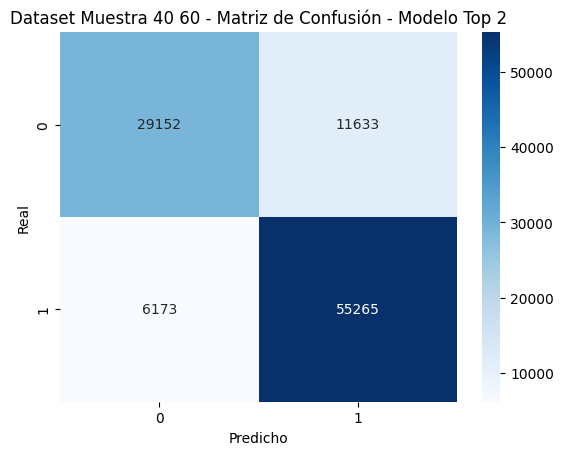


--- Dataset Muestra 40 60 - Modelo Top 3 ---
Capas ocultas: (32, 16)
Accuracy en entrenamiento: 0.8117
Accuracy en prueba: 0.8096
 Rendimiento equilibrado entre entrenamiento y prueba.

Matriz de confusión (test):
[[29983 10802]
 [ 8666 52772]]

Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       0.78      0.74      0.75     40785
           1       0.83      0.86      0.84     61438

    accuracy                           0.81    102223
   macro avg       0.80      0.80      0.80    102223
weighted avg       0.81      0.81      0.81    102223



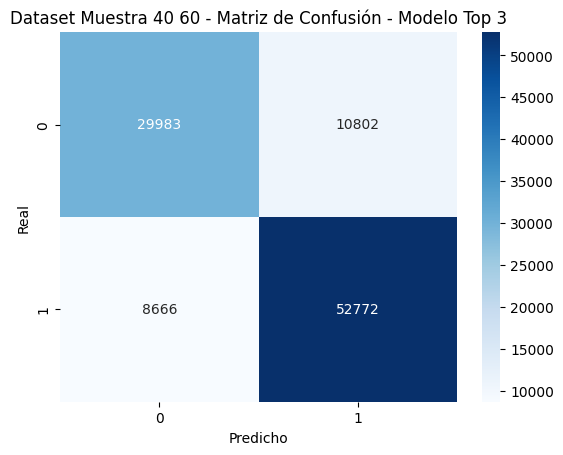

In [4]:
procesar_dataset('../Datos/dataset_muestra50.csv', 'Dataset Muestra 50 50')
procesar_dataset('../Datos/dataset_muestra60.csv', 'Dataset Muestra 40 60')